# Метод наименьших квадратов

Дана сложная математическая функция на отрезке $x\in[1, 15]$

$f(x)=sin\frac{x}{5}\cdot e^{\frac{x}{10}}+5e^{-\frac{1}{2}x}$

Задача состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. 

## 1. Полиномиальная регрессия

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

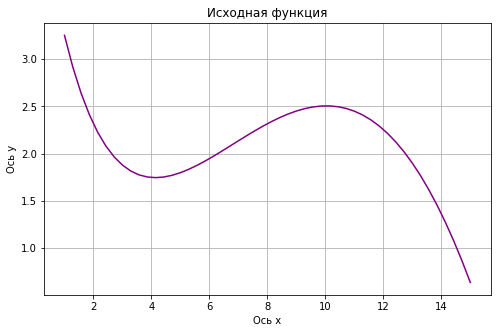

In [122]:
x = np.linspace(1, 15)
y = f(x)

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y, color = 'purple')
plt.xlabel('Ось x')
plt.ylabel('Ось y')
plt.title('Исходная функция')
plt.grid()

In [45]:
def approx(n):
    k = np.linspace(1, 15, n)
    a = np.array([[x**j for j in range(n)] for x in k])        
    b = f(k)
    w = np.linalg.solve(a, b)  
    return np.array([sum([w[j] * x**j for j in range(n)]) for x in k])

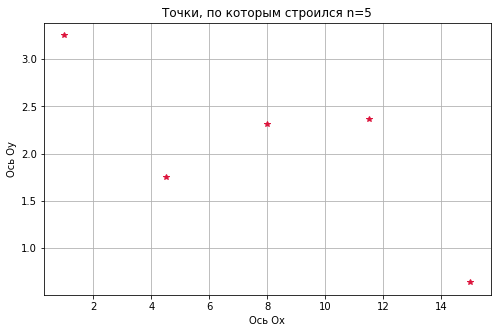

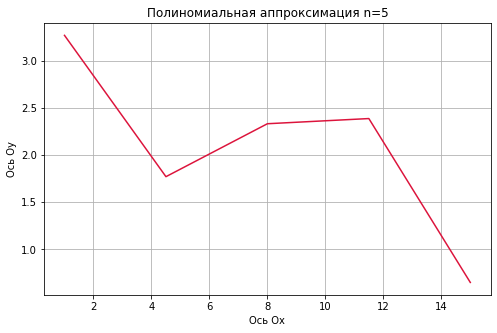

In [81]:
n = 5
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(np.linspace(1, 15, n), f(np.linspace(1, 15, n)), '*', color = 'crimson')
plt.title('Точки, по которым стpоился n=5')
plt.xlabel('Ось Оx')
plt.ylabel('Ось Оy')
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(np.linspace(1, 15, n), approx(n), color = 'crimson')
plt.title('Полиномиальная аппроксимация n=5')
plt.xlabel('Ось Оx')
plt.ylabel('Ось Оy')
plt.grid()
plt.show()

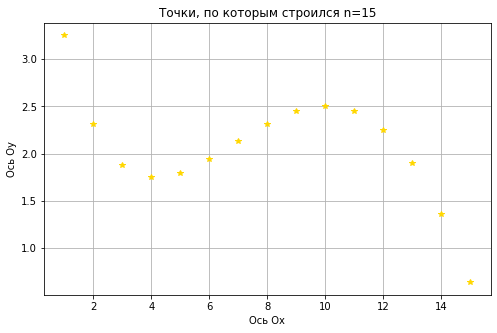

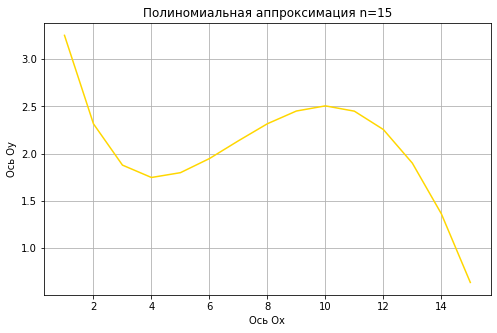

In [83]:
n = 15
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(np.linspace(1, 15, n), f(np.linspace(1, 15, n)), '*', color = 'gold')
plt.title('Точки, по которым стpоился n=15')
plt.xlabel('Ось Оx')
plt.ylabel('Ось Оy')
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(np.linspace(1, 15, n), approx(n), color = 'gold')
plt.title('Полиномиальная аппроксимация n=15')
plt.xlabel('Ось Оx')
plt.ylabel('Ось Оy')
plt.grid()
plt.show()

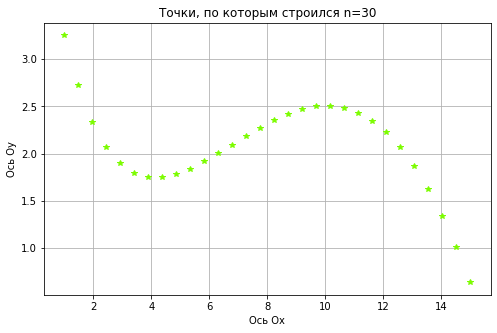

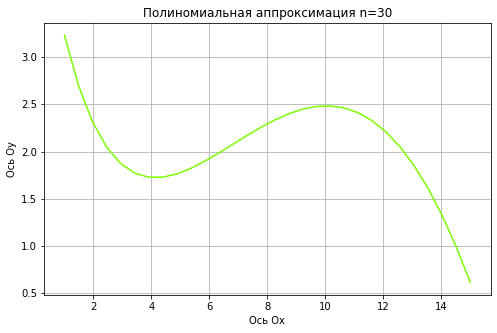

In [85]:
n = 30
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(np.linspace(1, 15, n), f(np.linspace(1, 15, n)), '*', color = 'lawngreen')
plt.title('Точки, по которым стpоился n=30')
plt.xlabel('Ось Оx')
plt.ylabel('Ось Оy')
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(np.linspace(1, 15, n), approx(n), color = 'lawngreen')
plt.title('Полиномиальная аппроксимация n=30')
plt.xlabel('Ось Оx')
plt.ylabel('Ось Оy')
plt.grid()
plt.show()

##### При увеличении количества точек приближение становится точнее.

## 2. Полиномиальная регрессия с зашумлённым данными

In [86]:
def approx(n):
    k = np.linspace(1, 15, n)
    a = np.array([[x**j for j in range(n)] for x in k])        
    b = f(k) + np.random.normal(0, 0.01, n)
    w = np.linalg.solve(a, b)  
    return np.array([sum([w[j] * x**j for j in range(n)]) for x in k])

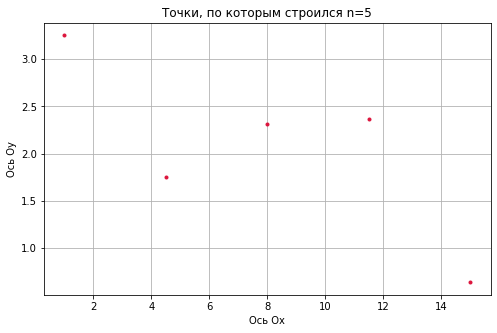

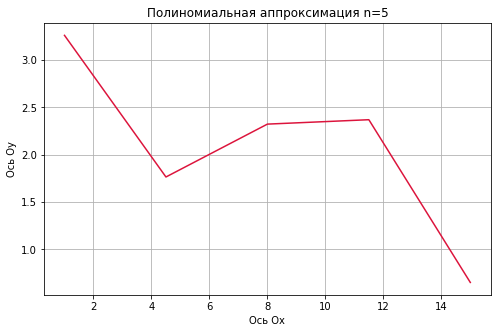

In [87]:
n = 5
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(np.linspace(1, 15, n), f(np.linspace(1, 15, n)), '.', color = 'crimson')
plt.title('Точки, по которым стpоился n=5')
plt.xlabel('Ось Оx')
plt.ylabel('Ось Оy')
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(np.linspace(1, 15, n), approx(n), color = 'crimson')
plt.title('Полиномиальная аппроксимация n=5')
plt.xlabel('Ось Оx')
plt.ylabel('Ось Оy')
plt.grid()
plt.show()

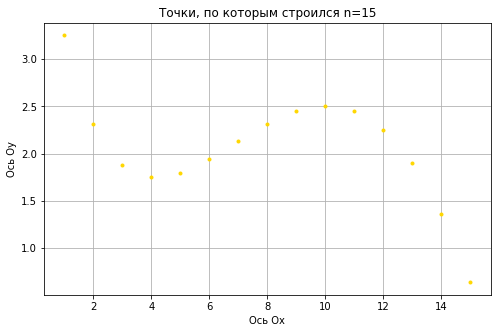

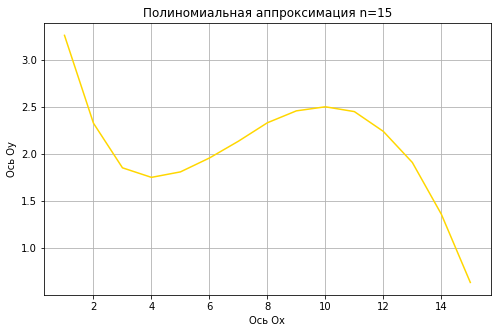

In [88]:
n = 15
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(np.linspace(1, 15, n), f(np.linspace(1, 15, n)), '.', color = 'gold')
plt.title('Точки, по которым стpоился n=15')
plt.xlabel('Ось Оx')
plt.ylabel('Ось Оy')
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(np.linspace(1, 15, n), approx(n), color = 'gold')
plt.title('Полиномиальная аппроксимация n=15')
plt.xlabel('Ось Оx')
plt.ylabel('Ось Оy')
plt.grid()
plt.show()

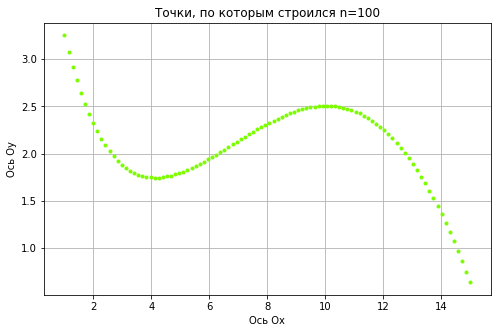

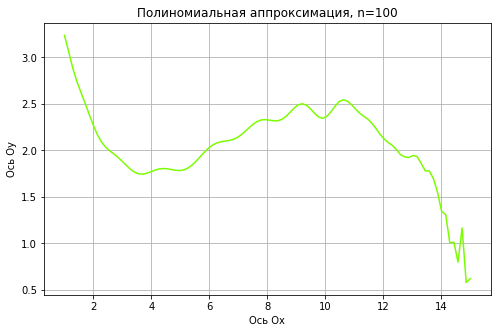

In [95]:
n = 100
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(np.linspace(1, 15, n), f(np.linspace(1, 15, n)), '.', color = 'lawngreen')
plt.title('Точки, по которым стpоился n=100')
plt.xlabel('Ось Оx')
plt.ylabel('Ось Оy')
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(np.linspace(1, 15, n), approx(n), color = 'lawngreen')
plt.title('Полиномиальная аппроксимация, n=100')
plt.xlabel('Ось Оx')
plt.ylabel('Ось Оy')
plt.grid()
plt.show()

##### При введении шума точность полиномиальной аппроксимации ухудшается, при этом в большей степени она влияет на аппроксимации с малым n. Добавление шума снижает точность решения, полученного аппроксимацией.

## 3. Метод наименьших квадратов 

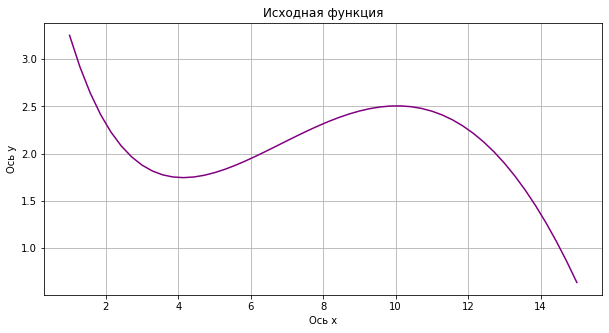

In [146]:
N = 100
def mnk(N, n):
    k = np.linspace(1, 15, N)
    a = np.array([[x**j for j in range(n)] for x in k])
    b = f(k)
    for i in range(len(b)):
        b[i] += np.random.normal(0, 0.1)
        
    w, resid, rank, s = np.linalg.lstsq(a, b, rcond=None)
    res = np.array([sum([w[j] * x**j for j in range(n)]) for x in k])  
    
    return res, b

x = np.linspace(1, 15)
y = f(x)

fig, ax = plt.subplots(figsize=(10,5))
plt.plot(x, y, color = 'purple')
plt.xlabel('Ось x')
plt.ylabel('Ось y')
plt.title('Исходная функция')
plt.grid()

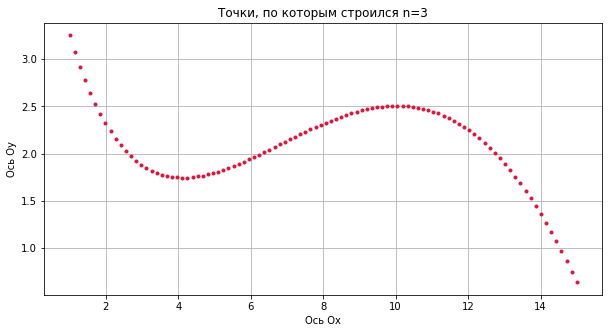

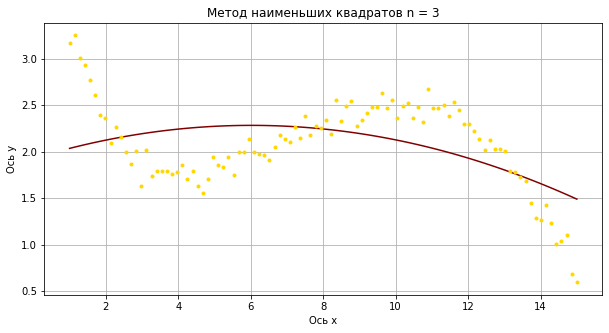

In [147]:
n = 3
res = mnk(N, n)
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(np.linspace(1, 15, N), f(np.linspace(1, 15, N)), '.', color = 'crimson')
plt.title('Точки, по которым стpоился n=3')
plt.xlabel('Ось Оx')
plt.ylabel('Ось Оy')
plt.grid()
plt.show()

res = mnk(N, n)
fig, ax = plt.subplots(figsize=(10,5))
plt.grid()
plt.title('Метод наименьших квадратов n = 3')
plt.plot(np.linspace(1, 15, N), res[0], color = 'maroon')
plt.plot(np.linspace(1, 15, N), res[1], '.', color = 'gold')
plt.xlabel('Ось x')
plt.ylabel('Ось y')
plt.show()

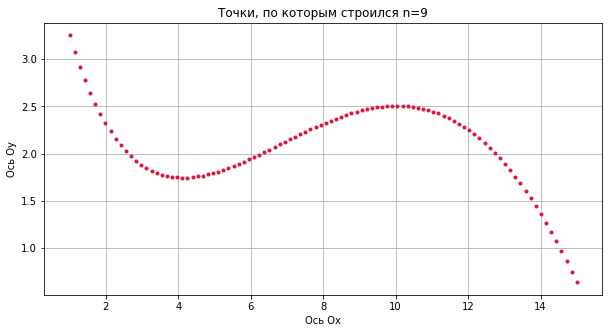

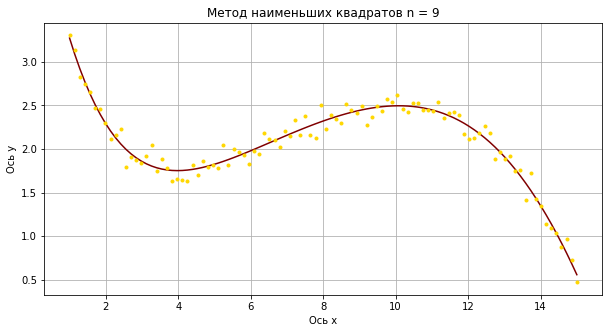

In [148]:
n = 9
res = mnk(N, n)
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(np.linspace(1, 15, N), f(np.linspace(1, 15, N)), '.', color = 'crimson')
plt.title('Точки, по которым стpоился n=9')
plt.xlabel('Ось Оx')
plt.ylabel('Ось Оy')
plt.grid()
plt.show()

res = mnk(N, n)
fig, ax = plt.subplots(figsize=(10,5))
plt.grid()
plt.title('Метод наименьших квадратов n = 9')
plt.plot(np.linspace(1, 15, N), res[0], color = 'maroon')
plt.plot(np.linspace(1, 15, N), res[1], '.', color = 'gold')
plt.xlabel('Ось x')
plt.ylabel('Ось y')
plt.show()

#### При использовании метода наименьших квадратов, график аппроксимации имеет достаточно большую степерь точности, несмотря на высокий уровень шума.

### Вывод: Полиномиальная регрессия хорошо приближает функцию если используется большое количество n, а также отсутсвует шум. Если шум присутсвует, то лучше использовать маленькое количество n, иначе график начинает строится скачкообразно. Метод наименьших квадратов аппроксимирует довольно точно и при маленьких n и сильном шуме.